In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
mpl.rcParams['figure.dpi'] = 100

In [16]:
df = pd.read_csv('C:/Users/Khush/Desktop/Datesets/cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [17]:
features_response = df.columns.tolist()

In [18]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']

In [19]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [8]:
corr = df[features_response].corr()
corr

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365
BILL_AMT1,0.287009,0.016156,-0.028610,0.056245,0.185826,1.000000,0.951651,0.900386,0.860149,0.828615,0.802008,0.138221,0.112460,0.145635,0.160204,0.163425,0.178943,-0.020508
BILL_AMT2,0.279289,0.012307,-0.026009,0.054099,0.188799,0.951651,1.000000,0.937488,0.892103,0.858078,0.830300,0.276583,0.114473,0.137514,0.148685,0.153851,0.172472,-0.014579
BILL_AMT3,0.285299,0.007683,-0.029192,0.054107,0.181257,0.900386,0.937488,1.000000,0.930385,0.889186,0.855154,0.242809,0.287837,0.119456,0.141010,0.159446,0.178121,-0.014649
BILL_AMT4,0.294342,-0.005862,-0.027740,0.051241,0.178812,0.860149,0.892103,0.930385,1.000000,0.937799,0.899241,0.229123,0.217716,0.293652,0.131700,0.158633,0.171339,-0.011349
BILL_AMT5,0.295198,-0.013174,-0.029895,0.049701,0.180438,0.828615,0.858078,0.889186,0.937799,1.000000,0.945671,0.212053,0.189566,0.241291,0.296192,0.140669,0.161847,-0.006753


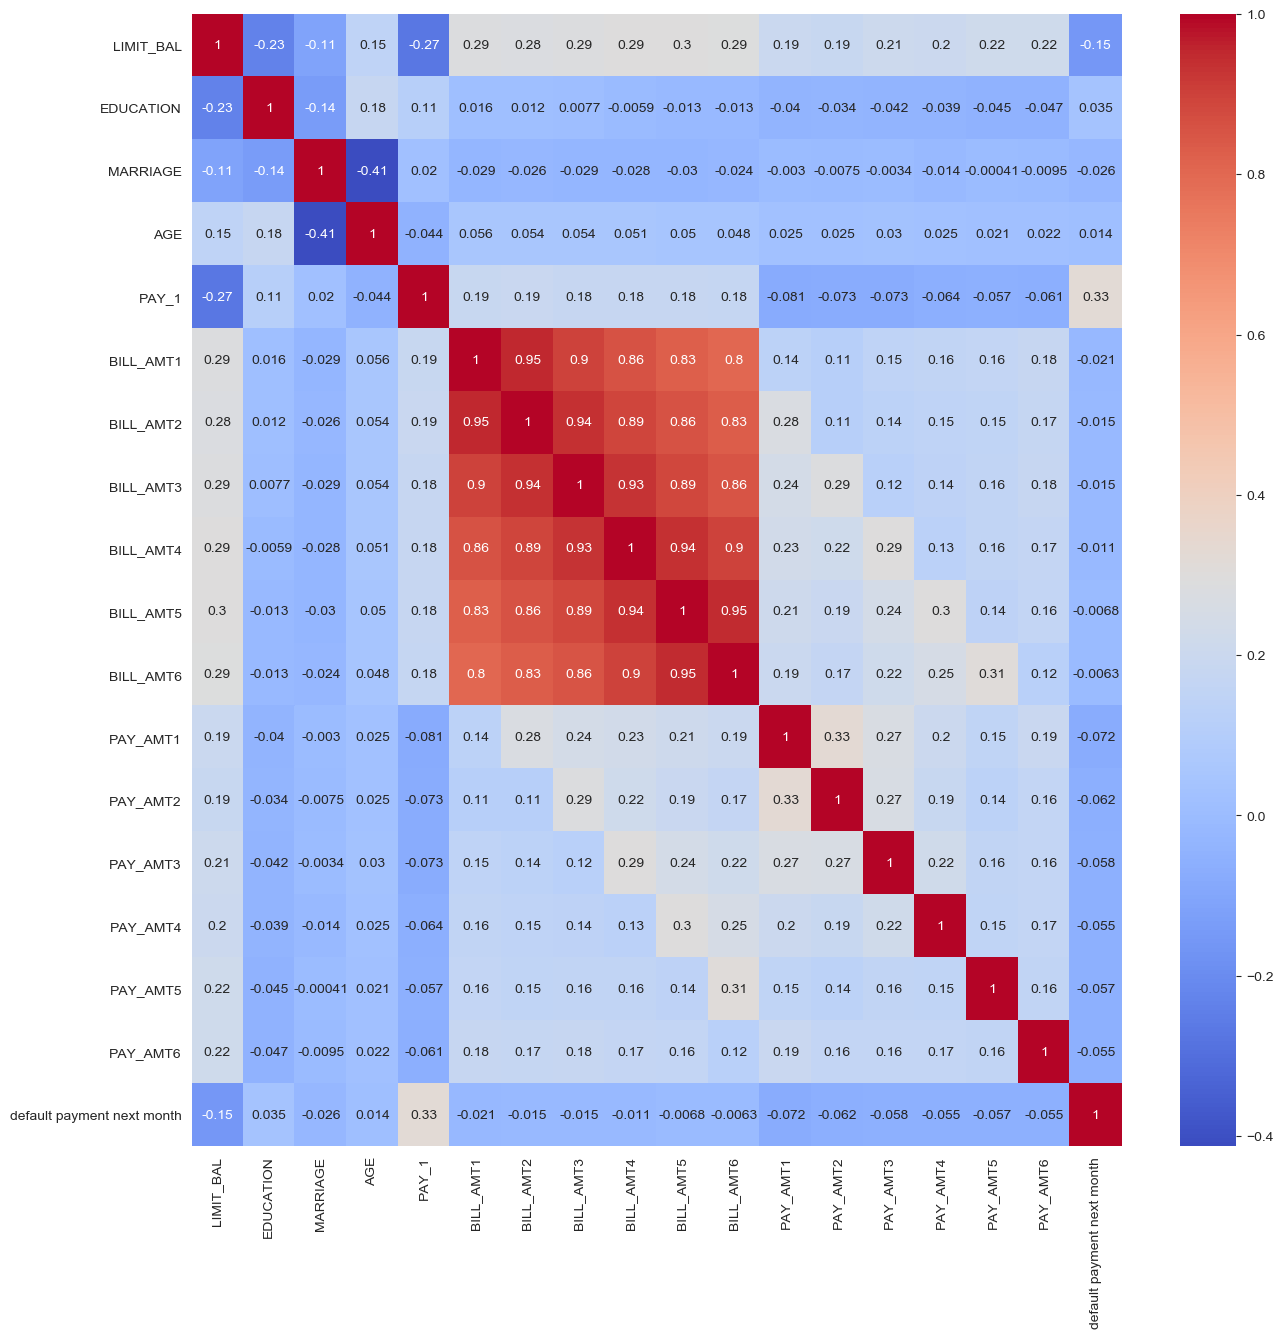

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Sigmoid Function')

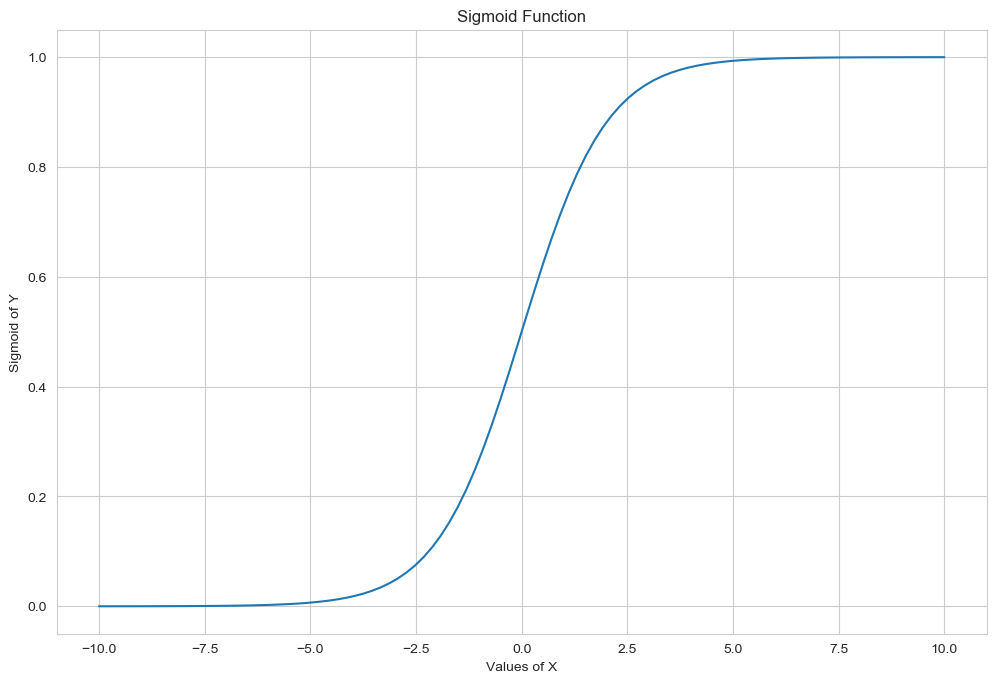

In [21]:
def sigmoid_func(x):
    y=1/(1/1+np.exp(-x))
    return y

import seaborn as sns
import matplotlib.pyplot as plt
x=np.linspace(-10,10,100)
x
z=1/(1+np.exp(-x))
z
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(x,z)
plt.xlabel('Values of X')
plt.ylabel('Sigmoid of Y')
plt.title('Sigmoid Function')

In [27]:
from sklearn.model_selection import train_test_split
X = df[['PAY_1' , 'LIMIT_BAL']]
y = df['default payment next month']
X,y

(       PAY_1  LIMIT_BAL
 0          2      20000
 1         -1     120000
 2          0      90000
 3          0      50000
 4         -1      50000
 ...      ...        ...
 26659      0     220000
 26660     -1     150000
 26661      4      30000
 26662      1      80000
 26663      0      50000
 
 [26664 rows x 2 columns],
 0        1
 1        1
 2        0
 3        0
 4        0
         ..
 26659    0
 26660    0
 26661    1
 26662    1
 26663    1
 Name: default payment next month, Length: 26664, dtype: int64)

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=24)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model = LogisticRegression(solver='liblinear')


In [31]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
pred = log_model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
pred_proba=log_model.predict_proba(X_test)
pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

In [34]:
np.ones((X_test.shape[0],1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [35]:
ones_feat=np.hstack([np.ones((X_test.shape[0],1)),X_test])
ones_feat

array([[ 1.0e+00,  2.0e+00,  1.6e+05],
       [ 1.0e+00,  1.0e+00,  5.0e+04],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00, -1.0e+00,  5.0e+04],
       [ 1.0e+00,  1.0e+00,  2.3e+05],
       [ 1.0e+00,  2.0e+00,  1.0e+05]])

In [36]:
ones_feat.shape

(5333, 3)

In [37]:
print('Coefficients Of Our Logistic Model',log_model.coef_)
print('\n')
print('Intercept of Our Logistic Model',log_model.intercept_)
log_model_coeff=log_model.coef_
log_model_intercept=log_model.intercept_

Coefficients Of Our Logistic Model [[ 8.27451187e-11 -6.80876727e-06]]


Intercept of Our Logistic Model [-6.57647457e-11]


In [38]:
coeff_interc_feats=np.concatenate([log_model_intercept.reshape(1,1),log_model_coeff],axis=1)
coeff_interc_feats

array([[-6.57647457e-11,  8.27451187e-11, -6.80876727e-06]])

In [39]:
coeff_interc_feats.shape

(1, 3)

In [40]:
man_pred_proba=np.dot(coeff_interc_feats,np.transpose(ones_feat))
man_pred_proba

array([[-1.08940276, -0.34043836, -1.36175345, ..., -0.34043836,
        -1.56601647, -0.68087673]])

In [41]:
def sigmoid_func(X):
    Y=1/(1/1+np.exp(-X))
    return Y

In [42]:
sigmoid_func(man_pred_proba)

array([[0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
        0.33606565]])

In [43]:
sig_man_predproba=sigmoid_func(man_pred_proba)

In [44]:
pred_manual=sig_man_predproba>=0.5
pred_manual.shape

(1, 5333)

In [45]:
np.array_equal(pred_manual,pred.reshape(1,-1))

True

In [46]:
from sklearn.metrics import roc_auc_score

In [47]:
roc_auc_score(y_test,pred_proba[:,1])

0.627207450280691

In [48]:
roc_auc_score(y_test,man_pred_proba.reshape(man_pred_proba.shape[1],))

0.627207450280691